<a href="https://colab.research.google.com/github/mitakshra/Hello-world/blob/master/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOW MANY PASSENGERS SURVIVED IN SHIP WRECK

---



In [1]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials


In [2]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


In [5]:
downloaded = drive.CreateFile({'id':'13_b6pxM1obBkCgdYMx9JiNu50XUwK_Jh'}) # replace the id with id of file you want to access
downloaded.GetContentFile('train.csv')


In [6]:
downloaded = drive.CreateFile({'id':'1wQHr69B28yXEHQp-JoZWRyVbPJzsQmrn'}) # replace the id with id of file you want to access
downloaded.GetContentFile('test.csv')

#** Exploratory data Analysis of TITANIC **

In [7]:
#DATA Manipulation
import pandas as pd
import numpy as np

#DATA Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno
#from pandas.tools.plotting import scatter_matrix

#Feature selection and encoding
from sklearn.feature_selection import RFE,RFECV
from sklearn.svm import SVR
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,label_binarize

#Machine Learning
import sklearn.ensemble as ske
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
import tensorflow as tf

#Grid and random search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

# Managing Warnings 
import warnings
warnings.filterwarnings('ignore')

# Plot the Figures Inline
%matplotlib inline

data1 = pd.read_csv("train.csv")
data2  = pd.read_csv("test.csv")
train = data1.copy()
test = data2.copy()



EDA of TITANIC

In [ ]:
train.head(10)

In [ ]:
#univariate analysis of the data
#we start with visualizng the data
# to understand the pattern
#analyze the pattern and any other such charactestics
#know the distributon of the data


In [ ]:
#visualzing the scatter plot
sns.scatterplot(x='Age',y = 'Survived',hue='Sex',data=train)

In [ ]:
#to find whih age group people died more also find outlier
sns.histplot(x='Age',bins='auto',hue='Survived',data=train,kde = True)

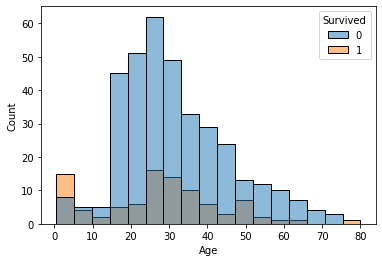

In [11]:
male = train[train.Sex == 'male'][['Age','Survived']]
sns.histplot(x='Age',hue='Survived',data=male)

In [ ]:
#which age female died more
female = train[train.Sex=='female'][['Age','Survived']]
sns.histplot(x='Age',hue='Survived',data=female)

In [13]:
#now we have seen that differnt gender have differnt survival rate depend on their age 
# so we need seprate mean for them to fill nan values
#use gropuby clause
val = train.groupby("Survived")["Age"].mean()
#print(val)
val1 = male.groupby("Survived")["Age"].mean()
print(val1)
val2 = female.groupby("Survived")["Age"].mean()
print(val2)

Survived
0    31.618056
1    27.276022
Name: Age, dtype: float64
Survived
0    25.046875
1    28.847716
Name: Age, dtype: float64


In [ ]:
train['Embarked'] = train['Embarked'].map({'S':0,'C':1})
train.head(5)
#another discrete varaible PClass combared with survived
sns.countplot(x = 'Pclass',hue = 'Survived',data=train,dodge=False)

In [ ]:
train.corr()
len(train)

891

In [16]:
for row in range(len(train)):
  if train.loc[row,'Sex']=='male' and train.loc[row,'Survived']==1:
    train.loc[row,'Age']=31.61
  elif train.loc[row,'Sex']=='male' and train.loc[row,'Survived']==0:
    train.loc[row,'Age']=27.27
  elif train.loc[row,'Sex']=='female' and train.loc[row,'Survived']==1:
    train.loc[row,'Age']=28.847
  elif train.loc[row,'Sex']=='female' and train.loc[row,'Survived']==0:
    train.loc[row,'Age']=25.04
#missingno.matrix(train,figsize=(25,10))  

In [17]:
#CHECKING MISSING DATA
#missingno.matrix(train,figsize=(25,10))
from sklearn.model_selection import train_test_split
#train['Age'].fillna(train['Age'].mean(),axis=0,inplace=True)
#train
#missingno.matrix(train,figsize=(25,10))
col = ['PassengerId','Name','Sex','Parch','Ticket','Cabin','Embarked']
train1 = train.drop(col,axis=1)
y  = train1['Survived'].values
features  = list(set(train1.columns)-set(['Survived']))
print("features",features)
x = train1[features].values
#print(x,y)
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3)
model = LogisticRegression()
model.fit(train_x,train_y)
pred = model.predict(test_x)
print(metrics.accuracy_score(test_y,pred))


features ['Age', 'SibSp', 'Pclass', 'Fare']
1.0


418
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  418 non-null    int64  
 1   Age     418 non-null    float64
 2   SibSp   418 non-null    int64  
 3   Fare    418 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 13.2 KB


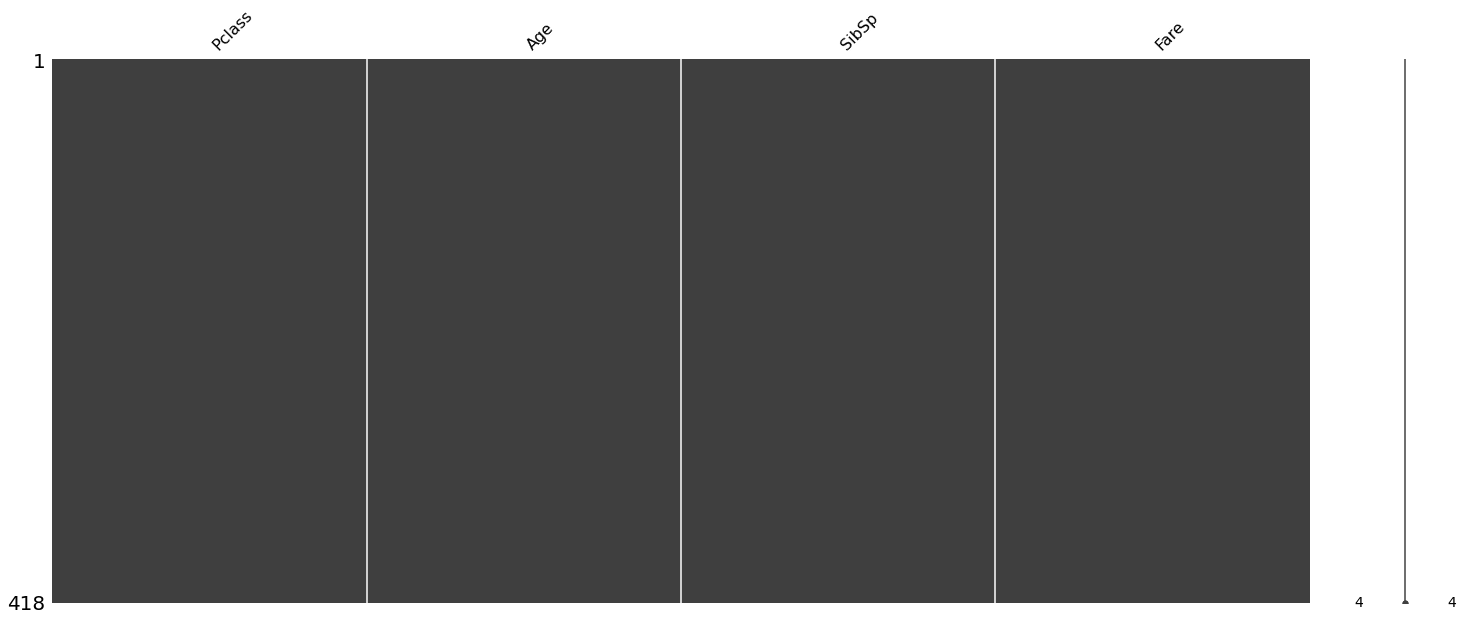

In [20]:
#####setting test data
test1= pd.read_csv("test.csv")
print(len(test1))

#missingno.matrix(test,figsize=(25,10))

col = ['PassengerId','Name','Parch','Ticket','Cabin','Embarked']
test2 = test1.drop(col,axis=1)
test2.isna().sum()
for row in range(len(test2)):
  if test2.loc[row,'Sex']=='male':
    test2.loc[row,'Age']=29
  elif test2.loc[row,'Sex']=='female':
    test2.loc[row,'Age']=27
#test1.dropna(axis=0)
#prediction = model.predict(test1)
#missingno.matrix(test2,figsize=(25,10))
test2 = test2.drop(['Sex'],axis=1)
test2.fillna(test2.Fare.mean(),inplace=True)
missingno.matrix(test2,figsize=(25,10))
prediction = model.predict(test2)
#print(prediction)
#print(metrics.accuracy_score(y,prediction
test2.info()


